# Aula 3 extra - dataviz de regressão linear

Esse conteúdo é parte de um material sobre produto escalar que eu produzi. Nele, apresentei a regressão linear pra evidenciar a aplicação do produto escalar para escrever a hipótese da regressão linear múltipla. Isso explica o teor da exposição, hehe.

Decidi compartilhar esse material com vcs pq acho que pode ser legal pra visualizar a regressão linear, sobretudo pelos códigos disponíveis! :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

____________

Como última aplicação do produo escalar, vamos falar sobre uma que é uma das mais fundamentais e importantes ferramentas de modelagem que um cientista de dados deve dominar: o método de **regressão linear**.

Não vamos entrar em muitos detalhes aqui (vocês discutirão este e outros métodos em grande detalhes em módulos futuros!). Nosso objetivo será enfatizar como é possível representarmos certos aspectos da regressão linear utilizando o produto escalar, o que torna a descrição do problema mais genérica e fácil de manipular matematicamente.

Considere os seguintes pontos no plano $(x, y)$ --- cada ponto é uma **observação** de um **conjunto de dados** (*dataset*). Utilizamos a biblioteca scikit-learn para a geração deste dataset:

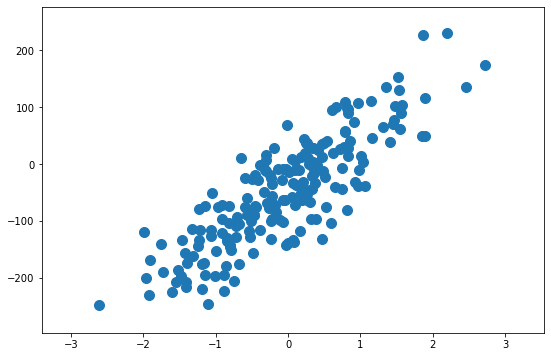

In [2]:
from sklearn.datasets import make_regression

# gerando o dataset

b = -50
x, y, coef = make_regression(n_samples=200, n_features=1, bias=b, 
                             tail_strength=10, noise=50, random_state=42, coef=True)

# ================================================

# plotando o dataset

plt.figure(figsize=(9, 6))

plt.plot(x, y, marker="o", markersize = 10.0, linestyle='None')

# ================================================

# ajustando os limites dos eixos

ax = plt.gca()
ax.set(xlim=(x.min()*1.3, x.max()*1.3), ylim=(y.min()*1.2, y.max()*1.2))

plt.show()

Olhando para os dados, é evidente que existe uma **relação** entre a variável $y$ (que costuma-se chamar de **target**) e a variável $x$ (que costuma-se chamar de **feature**). Mais do que isso, apesar de haver certa variabilidade, aparentemente existe uma relação **linear** entre a feature e o target, não é mesmo?

E é justamente isso que o método de regressão linear faz: este método é capaz de modelar uma **relação linear** entre a feature e o target. Isto é, dado que neste caso temos apenas uma única feature $x$, expressamos a relação entre os dados pela seguinte **equação de uma reta**:

$ y = w_0 + w_1 x $ (11)

Chamamos a função acima de **função hipótese** da modelagem. Note que esta função é **parametrizada** pelos **parâmetros** $w_0$ e $w_1$ (que também são chamados de **pesos**). Ambos os parâmetros são números reais, $w_0, w_1 \in \mathbb{R}$. É muito comum alocar estes parâmetros em um único vetor, conhecido como **vetor de parâmetros**. Neste caso, como temos apenas dois parâmetros, o vetor de parâmetros seria 

$\vec{w} = \begin{bmatrix}
w_0\\ 
w_1
\end{bmatrix}$ (12)

Estes parâmetros são extremamente importantes, pois são eles que **determinam qual reta específica** estamos considerando. Vamos entender isso melhor. O parâmetro $w_0$ é conhecido como "coeficiente linear" ou então **intercepto**, pois é justamente nesse valor que a reta **cruza (intercepta) o eixo y**; já o parâmetro $w_1$ é conhecido como "coeficiente angular", pois é este coeficiente que determina a **inclinação** da reta. Com isso em mente, considere a figura a seguir, gerada pelo seguinte trecho de código, que se utiliza da biblioteca Matplotlib:

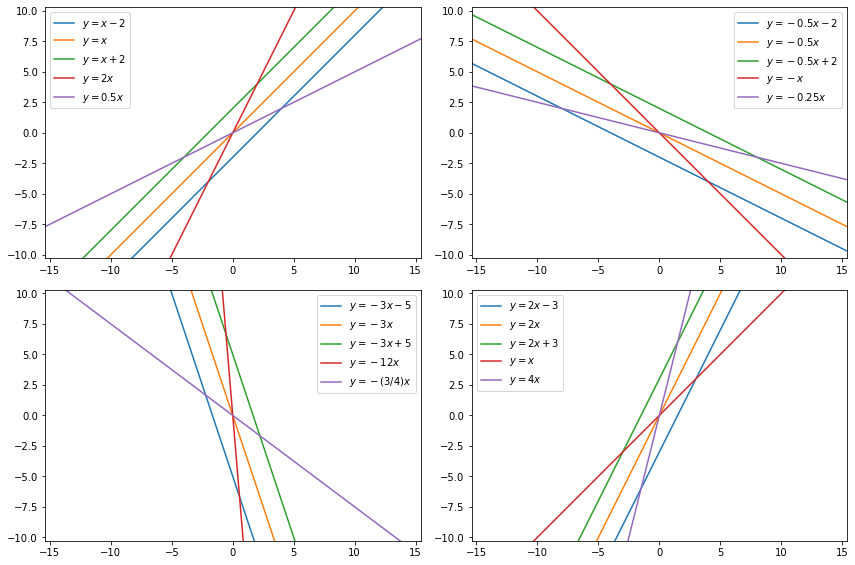

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

ax0, ax1, ax2, ax3 = axs.flatten()

# ================================================

x = np.linspace(-20, 20, 100)

# ================================================

ax0.plot(x, x - 2, label="$y=x-2$")
ax0.plot(x, x, label="$y=x$")
ax0.plot(x, x + 2, label="$y=x+2$")

ax0.plot(x, 2*x, label="$y=2x$")
ax0.plot(x, 0.5*x, label="$y=0.5x$")

_ = ax0.legend(loc="best")
ax0.axis('equal')
ax0.set(xlim=(-10, 10), ylim=(-10, 10))

# ================================================

ax1.plot(x, -0.5*x - 2, label="$y=-0.5x-2$")
ax1.plot(x, -0.5*x, label="$y=-0.5x$")
ax1.plot(x, -0.5*x + 2, label="$y=-0.5x+2$")

ax1.plot(x, -1*x, label="$y=-x$")
ax1.plot(x, -0.25*x, label="$y=-0.25x$")

_ = ax1.legend(loc="best")
ax1.axis('equal')
ax1.set(xlim=(-10, 10), ylim=(-10, 10))

# ================================================

ax2.plot(x, -3*x - 5, label="$y=-3x-5$")
ax2.plot(x, -3*x, label="$y=-3x$")
ax2.plot(x, -3*x + 5, label="$y=-3x+5$")

ax2.plot(x, -12*x, label="$y=-12x$")
ax2.plot(x, -3/4*x, label="$y=-(3/4)x$")

_ = ax2.legend(loc="best")
ax2.axis('equal')
ax2.set(xlim=(-10, 10), ylim=(-10, 10))

# ================================================

ax3.plot(x, 2*x - 3, label="$y=2x-3$")
ax3.plot(x, 2*x, label="$y=2x$")
ax3.plot(x, 2*x + 3, label="$y=2x+3$")

ax3.plot(x, 1*x, label="$y=x$")
ax3.plot(x, 4*x, label="$y=4x$")

_ = ax3.legend(loc="best")
ax3.axis('equal')
ax3.set(xlim=(-10, 10), ylim=(-10, 10))

# ================================================

plt.legend()
plt.tight_layout()
plt.show()

Note como, mudando os valores dos parâmetros $w_0$ e $w_1$, temos retas completamente diferentes, apesar de todas serem retas, e, portanto, terem equação da forma expressa na Eq. (11).

Assim sendo, note que a Eq. (11) descreve toda e qualquer reta que você possa imaginar --- há literalmente infinitas retas diferentes, dado que os parâmetros $w_0$ e $w_1$ cada um podem assumir infinitos valores possíveis!

O objetivo do método de regressão linear é muito simples: dado que existem infinitas retas possíveis, descritas pela hipótese da Eq. (11), desejamos determinar **qual é a reta que melhor se ajusta aos dados que temos disponíveis**. Afinal, uma vez que há infinitas opções de retas, é de se esperar que algumas delas descrevam bem os dados, enquanto outras claramente são péssimas descrições. Por exemplo, o trecho de código abaixo gera 4 exemplos de retas:

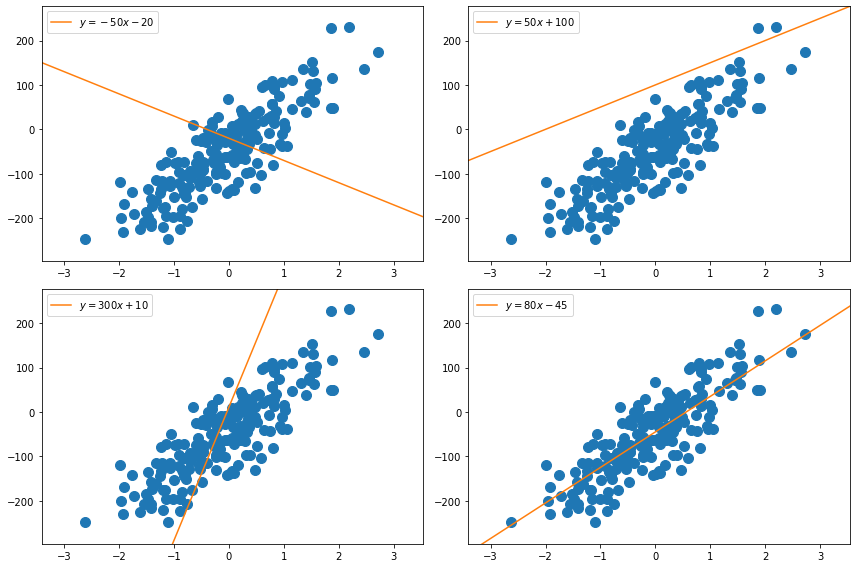

In [4]:
b = -50
x_data, y_data, coef = make_regression(n_samples=200, n_features=1, bias=b, 
                                       tail_strength=10, noise=50, random_state=42, coef=True)

# ================================================

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

ax0, ax1, ax2, ax3 = axs.flatten()

# ================================================

x = np.linspace(x_data.min()*2, x_data.max()*2, 100)

# ================================================


ax0.plot(x_data, y_data, marker="o", markersize = 10.0, linestyle='None')

ax0.plot(x, -50*x - 20, label="$y=-50x-20$")

_ = ax0.legend(loc="best")
ax0.set(xlim=(x_data.min()*1.3, x_data.max()*1.3), ylim=(y_data.min()*1.2, y_data.max()*1.2))

# # ================================================

ax1.plot(x_data, y_data, marker="o", markersize = 10.0, linestyle='None')

ax1.plot(x, 50*x + 100, label="$y=50x+100$")

_ = ax1.legend(loc="best")
ax1.set(xlim=(x_data.min()*1.3, x_data.max()*1.3), ylim=(y_data.min()*1.2, y_data.max()*1.2))

# # ================================================

ax2.plot(x_data, y_data, marker="o", markersize = 10.0, linestyle='None')

ax2.plot(x, 300*x + 10, label="$y=300x+10$")

_ = ax2.legend(loc="best")
ax2.set(xlim=(x_data.min()*1.3, x_data.max()*1.3), ylim=(y_data.min()*1.2, y_data.max()*1.2))

# # ================================================

ax3.plot(x_data, y_data, marker="o", markersize = 10.0, linestyle='None')

ax3.plot(x, 80*x - 45, label="$y=80x-45$")

_ = ax3.legend(loc="best")
ax3.set(xlim=(x_data.min()*1.3, x_data.max()*1.3), ylim=(y_data.min()*1.2, y_data.max()*1.2))


# ================================================

plt.legend()
plt.tight_layout()
plt.show()

O que o método de regressão linear faz é determinar, de todas as infinitas retas possíveis, aquela que **melhor se ajusta aos dados**, que no caso é identificada e plotada pelo seguinte trecho de código:


Parâmetros da melhor reta:
w0 = -50; w1 = 87.74



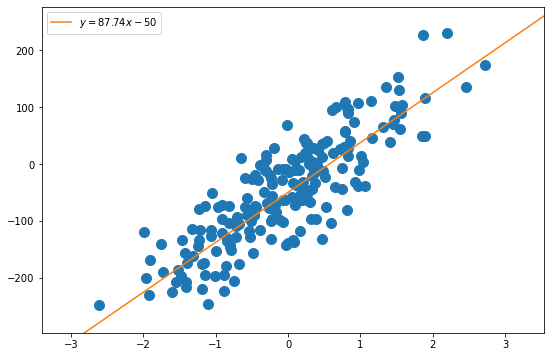

In [5]:
b = -50
x, y, coef = make_regression(n_samples=200, n_features=1, bias=b, 
                             tail_strength=10, noise=50, random_state=42, coef=True)

print("\nParâmetros da melhor reta:")
print(f"w0 = {b}; w1 = {coef:.2f}\n")

# ================================================

plt.figure(figsize=(9, 6))

plt.plot(x, y, marker="o", markersize = 10.0, linestyle='None')

# ================================================

x_model = np.linspace(-5, 5, 100)
y_model = b + coef*x_model

plt.plot(x_model, y_model, label=f"$y={coef:.2f}x{b}$")

ax = plt.gca()
ax.set(xlim=(x.min()*1.3, x.max()*1.3), ylim=(y.min()*1.2, y.max()*1.2))

plt.legend()
plt.show()

Um ponto muito importante é que a determinação de retas específicas é totalmente equivalente à **determinação do vetor de parâmetros**. Ou seja, operacionalmente, o que o método de regressão linear proporciona é uma maneira de **determinar o vetor de parâmetros que melhor se ajusta aos dados**! Muito interessante, não é mesmo? 

Imagino que a esta altura você deve estar se perguntando: "tá, mas como que este melhor vetor de parâmetros é determinado?!". Este é o ponto que não trataremos na aula de hoje, mas, prometo que logo logo vocês terão a resposta a esta importante pergunta, e, com isso, terão aprendido o primeiro método de machine learning!

Por enquanto, gostaria de chamar atenção a uma forma bem interessante de escrever a hipótese da Eq. (11), usando produto escalar! Para isso, considere a introdução do **vetor de features**:

$\vec{x} = \begin{bmatrix}
x_0\\ 
x_1
\end{bmatrix}$ (13)

É muito comum introduzirmos a "feature auxiliar" $x_0$ que é sempre fixada como sendo igual a $1$ (logo vai ficar claro o porquê). Desta maneira, como no nosso caso $x_1 = x$, podemos reescrever o vetor de features como:

$\vec{x} = \begin{bmatrix}
1\\ 
x
\end{bmatrix}$

Agora tome o produto escalar entre o vetor de parâmetros e o vetor de features. O resultado é exatamente a hipótese da Eq. (11):

$\vec{w} \cdot \vec{x}  =
\begin{bmatrix}
w_0\\ 
w_1
\end{bmatrix} \cdot
\begin{bmatrix}
x_0\\ 
x_1
\end{bmatrix}
= w_0x_0 + w_1x_1 = w_0 + w_1x $

Note que fixar $x_0 = 1$ é bem importante para que o coeficiente linear $w_0$ (que não acompanha nenhuma feature) seja correta e diretamente extraído do produto escalar acima! Assim sendo, podemos escrever a função hipótese da regressão linear de uma maneira extremamente simples --- é comum denotá-la por $f_{H, \vec{w}}(\vec{x})$, indicando que esta função de hipótese (subscrito $H$) é parametrizada (subscrito $\vec{w}$):

$f_{H, \vec{w}}(\vec{x}) = \vec{w} \cdot \vec{x}$ (14)

Muito legal, não é mesmo?

E podemos ir além: o método de regressão linear é facilmente generalizado para $n$ dimensões, quando temos não uma, mas $n$ features. É comum que, neste caso, nos refiramos ao método por "regressão multilinear", onde o "multi" indica que há mais de uma feature. No entanto, chamar o método apenas de "regressão linear", independente da quantidade de feautres, é suficiente. O importante é que, neste caso, a hipótese não representa mais uma reta, mas sim um **hiperplano em dimensão $n$**. Apesar do nome complicado, a relação continua a mesma: uma combinação linear entre as features e os parâmetros! A única coisa que muda é que estes vetores agora estão no $\mathbb{R}^n$:

$\vec{w} =
\begin{bmatrix}
w_0\\ 
w_1\\
\vdots\\
w_n
\end{bmatrix} \ ; \
\vec{x} =
\begin{bmatrix}
1\\ 
x_1\\
\vdots\\
x_n
\end{bmatrix}
$

Note que já fixamos $x_0 = 1$, nossa feature auxiliar para a extração do parâmetro $w_0$. O que é interessante é que, mesmo neste caso em dimensão arbitrária $n$, temos exatamente **a mesma hipótese**, conforme a Eq. (14). A única coisa é que, como os vetores são de dimensão $n$, o produto escalar resulta em mais termos na combinação linear:

$f_{H, \vec{w}}(\vec{x}) = \vec{w} \cdot \vec{x} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n$

Existe ainda outras formas de representarmos a função de hipótese da regressão linear, em particular, uma que agrega as informações em matrizes, o que é uma forma extremamente conveniente de escrever e trabalhar com o problema (o que mostra, mais uma vez, o quanto álgebra linear é importante e onipresente!). Não veremos esta outra representação nesta aula, mas certamente você a encontrará no futuro!

________